In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

In [2]:
path='../Data/'

In [3]:
# Load data into Dataframe

whites =pd.read_csv(path+'white_wines_clean.csv', sep=';', header=0, encoding_errors='replace', encoding='iso8859_2')
reds =pd.read_csv(path+'red_wines_clean.csv', sep=';', header=0, encoding_errors='replace', encoding='iso8859_2')


reds['rw'] = 'red'
whites['rw'] = 'white'

df = pd.concat([whites, reds])

df['idname'] = df.name + ' - ' + df.company

df = df.set_index('idname')

df.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes,rw
idname,,,,,,,,,,,,,,,
Dolée - Vie di Romans,Vie di Romans,Dolée,4.2,31,36.00,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Friulano,2008.0,64.4267,26.4338,51.6989,albero da frutta/agrume/legno,white
Phigaia El Blanco - Serafini & Vidotto,Serafini & Vidotto,Phigaia El Blanco,3.8,28,15.90,na / na / na,Italia,delle Venezie,Miscela,2018.0,NaN,NaN,NaN,NaN,white
Ciampagnis Chardonnay - Vie di Romans,Vie di Romans,Ciampagnis Chardonnay,4.1,38,21.15,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2020.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume,white
Vermentino - Fattoria Sardi,Fattoria Sardi,Vermentino,3.9,46,12.00,Pasta / Vegetariano / Antipasti e spuntini,Italia,Colline Lucchesi,Vermentino,2019.0,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo,white
Vernaccia di San Gimignano Blanco - Panizzi,Panizzi,Vernaccia di San Gimignano Blanco,3.8,400,9.90,Pasta / Vegetariano / Antipasti e spuntini,Italia,Vernaccia di San Gimignano,Vernaccia di San Gimignano,2018.0,43.9714,18.4180,66.2523,albero da frutta/agrume/Erbaceo,white


In [4]:
df['idname'] = df.name + ' - ' + df.company

df = df.set_index('idname')

In [5]:
# We have few missing

df.isna().sum()

company         0
name            0
avg_review      0
num_review      0
price           0
food_advice     0
country         0
region          0
wine_type      24
year            8
legg_strutt    43
secco_dolce    43
piatto_acid    43
notes          54
rw              0
dtype: int64

In [6]:
df_unique = df.groupby(['name', 'company', 'wine_type', 'region', 'rw'], as_index=False).mean()

df_unique

,name,company,wine_type,region,rw,avg_review,num_review,price,year,legg_strutt,secco_dolce,piatto_acid
0,'Askos' Verdeca,Li Veli,Verdeca,Valle d'Itria,white,3.90,34.000000,15.400000,2021.000000,64.7363,7.82405,34.42390
1,(MozArt Wine) Brunello di Montalcino,Il Paradiso di Frassina,Sangiovese,Brunello di Montalcino,red,4.30,267.000000,43.780000,2016.000000,46.9660,55.15590,5.14170
2,003 Pecorino,Castrum Morisci,Pecorino,Falerio,white,4.00,34.000000,12.400000,2019.000000,45.9176,10.85740,67.64270
3,010 Lugana,Bulgarini,Verdicchio,Lugana,white,4.20,145.000000,13.970000,2020.000000,60.1968,19.78160,49.90270
4,110 e Lode Merlot,Pilandro,Merlot,Veneto,red,4.40,107.000000,43.000000,2015.000000,70.0142,51.33780,18.50440
...,...,...,...,...,...,...,...,...,...,...,...,...
2654,Zibibbo in Pithos,COS,Zibibbo,Terre Siciliane,white,3.70,96.000000,24.890000,2019.000000,61.5005,13.32440,28.05400
2655,Zěn Fiano,Produttori Vini Manduria,Fiano,Puglia,white,4.00,526.000000,10.200000,2020.000000,58.1129,13.01410,33.69880
2656,d'Alceo,Castello dei Rampolla,Cabernet Sauvignon,Toscana,red,4.40,91.333333,149.931667,2005.833333,52.3563,45.14100,17.66995
2657,d'Alceo,Castello dei Rampolla,Miscela,Toscana,red,4.42,163.600000,158.600000,2006.400000,52.3688,45.14364,17.66060


In [7]:

df_group = df_unique.groupby(['wine_type', 'rw'], as_index=False).count().sort_values(by='name', ascending=False)
df_group['wine_type2'] = np.where(df_group.name<20, 'Other', df_group['wine_type'])
df_group.sort_values(by='rw', inplace=True)

In [8]:
domain = ['red', 'white']
range_ = ['#8F124A', '#BDB450']

In [9]:
# Plot about number of wines per wine type and wine color distribution

alt.Chart(df_group).mark_bar().encode(
    y=alt.Y('wine_type2:N', sort='-x', title='Wine Type'),
    x=alt.X('name:Q', title='N. of Wines'),
    color=alt.Color('rw:N', title=None, scale=alt.Scale(domain=domain, range=range_)),
)

alt.Chart(...)

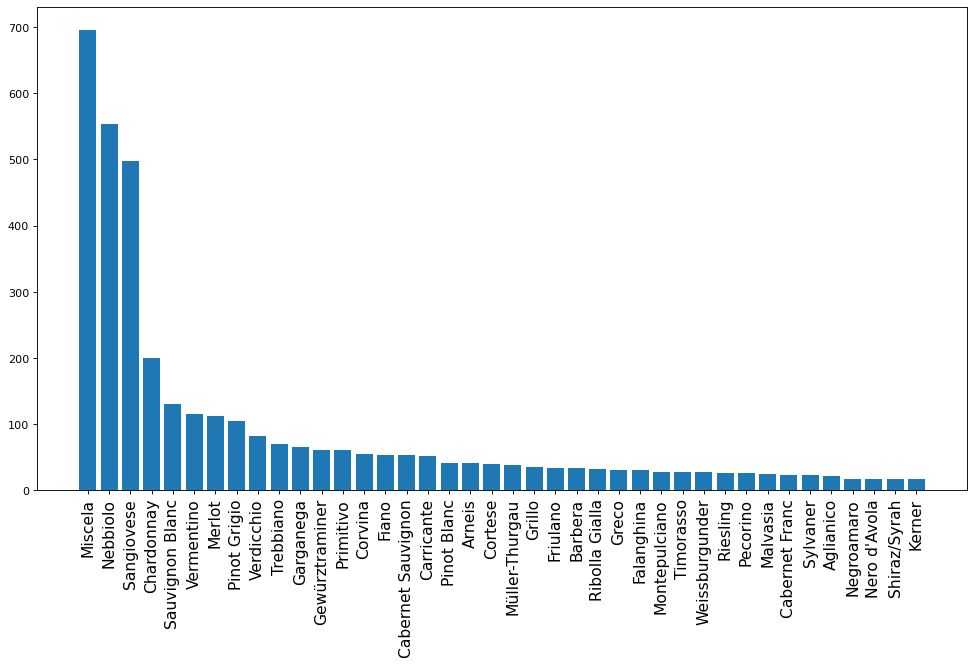

In [10]:
# Number of wines per wine type

ntop = 40
plt.figure(figsize=(15, 8), dpi=80)
df_group = df.groupby('wine_type').count().sort_values(by='name', ascending=False)[:ntop]
top_N = df_group.index
plt.bar(df_group.index, df_group.name.to_list())
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [11]:
# Mean price, total reviews and number of different wines per region

df_regions = df_unique.groupby(['region']).agg(mean_price=('price', 'mean'), tot_reviews=('num_review', 'sum'), N_diff_wines=('name', 'count'))
df_regions

,mean_price,tot_reviews,N_diff_wines
region,,,
Abruzzo,20.211000,69031.5,10
Aglianico del Vulture,27.000000,31.0,1
Aglianico del Vulture Superiore,49.000000,32.0,1
Alghero,12.983333,405.0,3
Alpi Retiche,16.900000,73.0,1
...,...,...,...
Vigneti delle Dolomiti,26.577083,2825.5,24
Vino Nobile di Montepulciano,49.999091,1429.0,11
Vino d'Italia,28.820000,32792.0,5


In [12]:
wtypes = df.wine_type.unique().astype(str)
#wtypes = wtypes[pd.logical_not(np.isnan(wtypes))]
for wtype in df.wine_type.unique():
    if not pd.isna(wtype):
        
        df_type = df[df.wine_type==wtype]
        
        df_type = df_type.sort_values(by='num_review', ascending=False)
        #print('nome:     \t', df_type.name.to_list()[0])
        if df_type.num_review.to_list()[0] >= 1500:
            print('tipologia:\t', wtype)
            print('n reviews:     \t', df_type.num_review.to_list()[0])
            print('azienda:\t', df_type.company.to_list()[0])
            print('-'*30)

tipologia:	 Miscela
n reviews:     	 67196
azienda:	 Farnese
------------------------------
tipologia:	 Chardonnay
n reviews:     	 2975
azienda:	 Antinori
------------------------------
tipologia:	 Vermentino
n reviews:     	 1956
azienda:	 Antinori
------------------------------
tipologia:	 Pecorino
n reviews:     	 1508
azienda:	 Umani Ronchi
------------------------------
tipologia:	 Nero d'Avola
n reviews:     	 2255
azienda:	 Donnafugata
------------------------------
tipologia:	 Trebbiano
n reviews:     	 2768
azienda:	 Antinori
------------------------------
tipologia:	 Sangiovese
n reviews:     	 11001
azienda:	 Antinori
------------------------------
tipologia:	 Nebbiolo
n reviews:     	 4662
azienda:	 Produttori del Barbaresco
------------------------------
tipologia:	 Cabernet Sauvignon
n reviews:     	 6742
azienda:	 Tenuta San Guido
------------------------------
tipologia:	 Negroamaro
n reviews:     	 32632
azienda:	 San Marzano
------------------------------
tipologia:	

In [13]:
wtypes = df.wine_type.unique()

In [40]:
types_aggr_w = df[df['rw']=='white'].groupby('wine_type', as_index=False).mean()
types_aggr_r = df[df['rw']=='red'].groupby('wine_type', as_index=False).mean()

In [41]:
# Wine type mapped on structure characteristics

alt.Chart(types_aggr_w).mark_circle(opacity=0.8, size=200).encode(
    x=alt.X('legg_strutt:Q', title='Leggero - Strutturato', scale=alt.Scale(domain=[30, 75])),
    y=alt.Y('piatto_acid:Q', title='Piatto - Acidulo', scale=alt.Scale(domain=[15, 75])),
    color=alt.Color('secco_dolce:Q', title='Secco - Dolce', scale=alt.Scale(scheme='oranges')),
    tooltip=alt.Tooltip('wine_type:N', title='Wine Type')
).interactive().properties(
    width=800,
    height=600
)


alt.Chart(...)

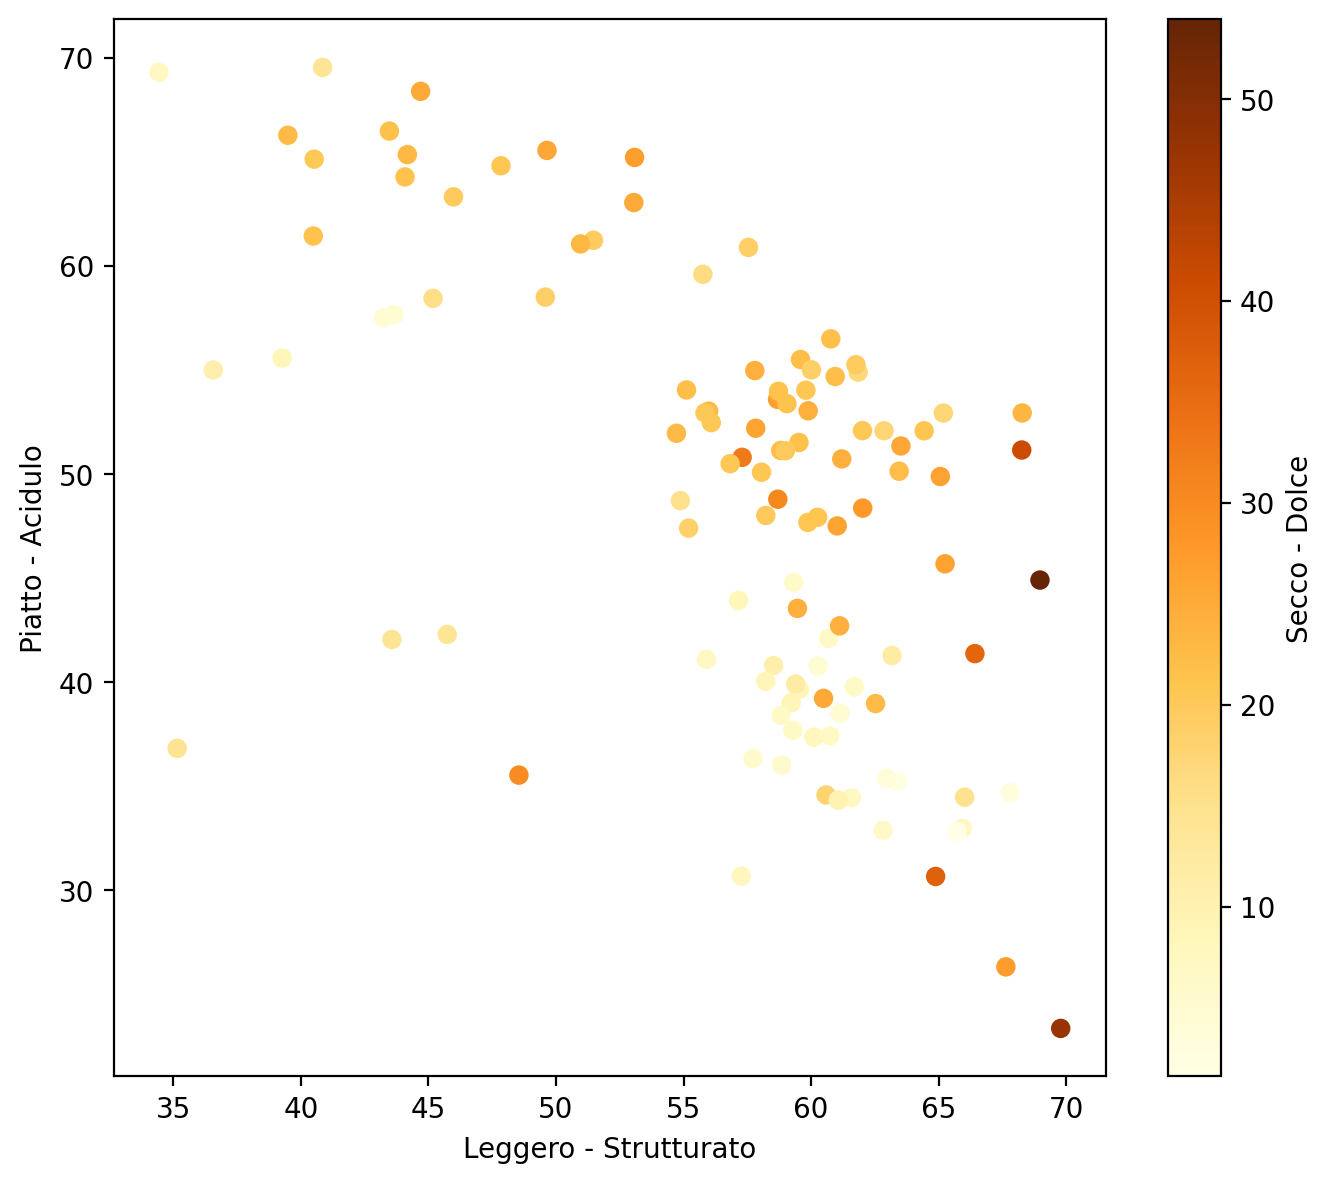

In [43]:
plt.figure(figsize=(8, 7), dpi=200)
from adjustText import adjust_text
plt.scatter(types_aggr_w.legg_strutt, types_aggr_w.piatto_acid, c=types_aggr_w.secco_dolce, cmap='YlOrBr')
plt.xlabel('Leggero - Strutturato')
plt.ylabel('Piatto - Acidulo')
plt.colorbar(label='Secco - Dolce')

texts = []
for idtx, row in types_aggr_w.iterrows():
    if idtx in top_N:
        texts.append(plt.annotate(idtx, (row.legg_strutt, row.piatto_acid), fontsize=8, alpha=.8))

adjust_text(texts)
plt.savefig('wine_structures.png')        
plt.show()

In [18]:
with open('region.csv', 'w', encoding='iso8859_2') as fin:
    for region in df.region.unique():
        #print(dir(fin))
        fin.write(region+'\n')

In [19]:
df_grp = df.groupby(['company', 'name']).count()

df.set_index(['company', 'name']).join(df_grp[df_grp.year>1], rsuffix='_2', how='inner')[['year']].sort_values(['company','name']).head(20)

year
company                                        name                                
Abbazia di Novacella (Stiftskellerei Neustift) Müller Thurgau                2020.0
                                               Müller Thurgau                2019.0
                                               Praepositus Grüner Veltliner  2016.0
                                               Praepositus Grüner Veltliner  2018.0
                                               Praepositus Grüner Veltliner  2017.0
                                               Praepositus Kerner            2019.0
                                               Praepositus Kerner            2020.0
                                               Praepositus Riesling          2019.0
                                               Praepositus Riesling          2017.0
                                               Sylvaner                      2020.0
                                               Sylvaner                      2019.0
Agostino Pavia & Figli                         La Marescialla                2018.0
                                               La Marescialla                2017.0
Aldo Conterno                                  Barolo Bussia                 2017.0
                                               Barolo Bussia                 2016.0
                                               Barolo Bussia                 1999.0
                                               Barolo Bussia Cicala          2015.0
                                               Barolo Bussia Cicala          1999.0
                                               Barolo Bussia Cicala          2012.0
                                               Barolo Bussia Cicala          2005.0

In [20]:
# Price range on number of wines per wine color 

cost = [5, 10, 15, 20, 30, 50, 100, 200, 500, 1000, 3000] 
df_unique['price_range'] = ''
price_order = []
for i in range(len(cost)-1):
    df_unique['price_range'] += np.where(np.logical_and(cost[i]<= df_unique.price, df_unique.price < cost[i+1]), str(cost[i])+'-'+str(cost[i+1]), '')
    price_order.append(str(cost[i])+'-'+str(cost[i+1]))
df_grp = df_unique.groupby(['price_range', 'rw'], as_index=False).count()


alt.Chart(df_grp).mark_bar().encode(
    y=alt.Y('name:Q', title='Number of Wines'),
    x=alt.X('price_range:N', title='Price Range (€)', sort=price_order),
    color=alt.Color('rw:N', title=None),
    tooltip= ['rw', 'name']
).properties(width=600, height=400)

alt.Chart(...)

In [21]:
cost = [5, 10, 15, 20, 30, 50, 100, 200, 500, 1000, 3000] 
df_unique['price_range'] = ''
price_order = []
for i in range(len(cost)-1):
    df_unique['price_range'] += np.where(np.logical_and(cost[i]<= df_unique.price, df_unique.price < cost[i+1]), str(cost[i])+'-'+str(cost[i+1]), '')
    price_order.append(str(cost[i])+'-'+str(cost[i+1]))
df_grp = df_unique.groupby(['price_range', 'rw'], as_index=False).count()


alt.Chart(df_grp.sort_values('rw')).mark_bar().encode(
    y=alt.Y('name:Q', title='Number of Wines'),
    x=alt.X('price_range:N', title='Price Range (€)', sort=price_order),
    color=alt.Color('rw:N', title=None, scale=alt.Scale(domain=domain, range=range_)),
    tooltip= [alt.Tooltip('rw', title='Type'), alt.Tooltip('name', title='N. Wines')]
).properties(width=600, height=400)

alt.Chart(...)

In [22]:
# Average price and number of wines per year

df_year = df.groupby('year', as_index=False).agg(mean_price=('price', 'mean'), N_diff_wines=('name', 'count'))


base = alt.Chart(df_year[df_year.year>=2000]).encode(
    alt.X('year:N', axis=alt.Axis(title='Year of Production'))
)

bar = base.mark_bar(opacity=1, color='#8C8C8C').encode(
    alt.Y('N_diff_wines',
        axis=alt.Axis(title='Num. of Wines'))
    
)

line = base.mark_line(stroke='#BA1628', interpolate='monotone').encode(
    alt.Y('mean_price',
          axis=alt.Axis(title='Avg. Price (€)')),
    tooltip='mean_price'

)

alt.layer(bar, line).resolve_scale(
    y = 'independent',
    
)
# Only great wines are suitable for aging so the oldest wines are the most valuable

alt.LayerChart(...)

In [23]:
# Number of reviews and average price per wine type

df_types = df_unique.groupby('wine_type', as_index=False).agg(mean_price=('price', 'mean'), num_revs=('num_review', 'sum')).sort_values('mean_price', ascending=False)



base = alt.Chart(df_types).encode(
    alt.X('wine_type:N', axis=alt.Axis(title='Wine Type'), sort=df_types.wine_type.to_list())
)

line = base.mark_line(stroke='#BA1628', interpolate='monotone').encode(
    alt.Y('mean_price',
          axis=alt.Axis(title='Avg. Price (€)', titleColor='black')),

)

bar = base.mark_bar(opacity=1, color='#8C8C8C').encode(
    alt.Y('num_revs',
        axis=alt.Axis(title='Num. of Reviews', titleColor='black'))
    
    
)



alt.layer(bar, line).resolve_scale(
    y = 'independent'
    
).properties(width=1200)


alt.LayerChart(...)